# Box and Whisker Plots

### Project Intentions

* Look at the history of boxplots and the reasons why this graphical representation was adopted by so many in the 20th Century
* Explain how to read box and whisker plots
* Use boxplots, and variations of boxplots to graphically display data
* Investigate the limitations of boxplots, and alternatives to boxplots

### Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### Definitions

Before we look at box plots, it's important to know a little about the statistical measures a box plot represents. 

* **Maximum Value** is the largest numerical value in a data set. 
* **Minimum Value** is the smallest numerical value in a data set. 
* **The Range** is the difference between the Max and Min values.
* **Outlier** is a data point that is noticeably larger or smaller than other data points in the set. 
* **Median** (Q2) is the middle value when data is ordered. It is a useful measure of central tendency, when the set contains extreme values or outliers. 
* **Lower Quartile** (Q1) is the median of the lower half of the data set. 
* **Upper Quartile** (Q3) is the median of the upper half of the data set. 
* **Interquartile Range** is the difference between the Q3 and Q1 values. It is a measure of spread which can be useful in sets containing outliers. 

A basic boxplot, is a graphical representation of these statistics. 

<img src='images/boxplot_basic.png' width = 50% align = 'left' style ='margin:0px 60px' >
<br>
1. Minimum value
2. Lower Quartile (Q1)
3. Median(Q2)
4. Upper Quartile(Q3)
5. Maximum value

In a box plot the length of the whiskers, the lines extending from the box, is equal to the range.

The length of the box is equal to the Interquartile Range, and 50% of my data is contained within the box.

### History of the Boxplot

The boxplot was intially devised by John Tukey in the 1970s. It was an easy way to graphically represent summary statistics, and could be easily completed by hand. Even today at GCSE level, Maths students in England use cumulative frequency curves to quickly calculate statistics and construct a boxplot by hand. Although the boxplot has been widely adopted in the last 50 years, it's a graphical representation that has never been taught in Irish schools.

![John W. Tukey](https://upload.wikimedia.org/wikipedia/en/e/e9/John_Tukey.jpg)

### Usefulness
- Ideal for looking at the distribution of ranked data.
- Box plots allow for quick comparison between datasets.
- Box plots are similar to histograms, but the shape of a histogram can be infleunced by the number of bins you choose. You don't have this problem with box plots. 

### Plotting with Box Plots

There are several packages available that allow us to plot large amounts of data on box plots. For the purposes of this investigation I am going to focus on using Seaborn and Matplotlib, two Python libraries. 

#### Standard Normal Distribution with and without Outliers

In [118]:
norm = np.random.standard_normal(1000)

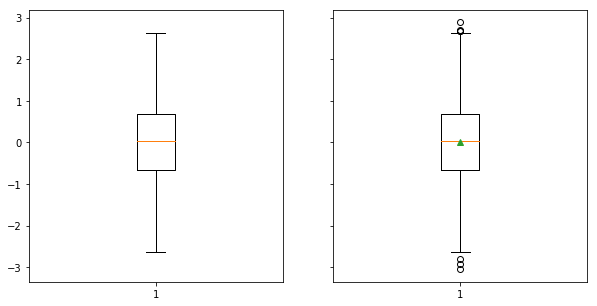

In [119]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
ax1.boxplot(norm, showcaps = True, showfliers= False)
ax2.boxplot(norm, showcaps = True, showmeans = True);

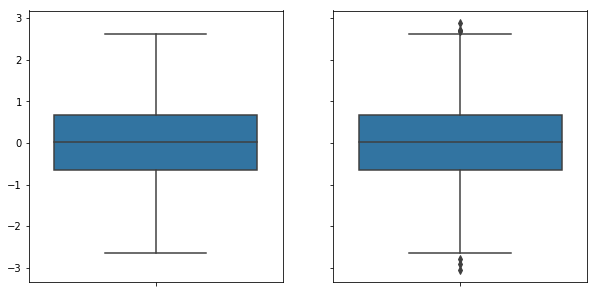

In [120]:
f, axes = plt.subplots(1, 2, sharey = True, figsize=(10, 5))

sns.boxplot(norm, showfliers = False, ax = axes[0],  orient = 'v');
sns.boxplot(norm, ax=axes[1],  orient = 'v');
#Reference: https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot

Box plots can be used in conjunction with probability density functions, to make inferences about the range of values within which 50% or 25% of events lie. 

In [121]:
# Calculating percentiles
q3 = np.percentile(norm, 75)
q1 = np.percentile(norm, 25)
top = np.max(norm)
bottom = np.min(norm)

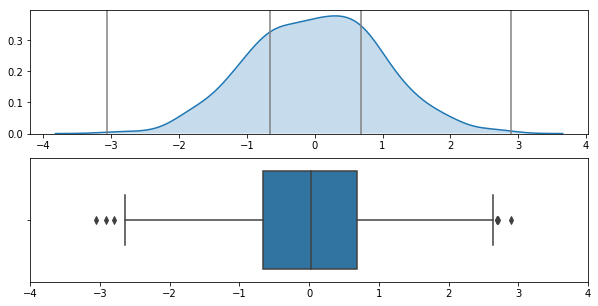

In [133]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5));
#Subplot with PDF of normally distributed data and it's box plot
sns.kdeplot(norm, ax = ax1, shade= True);
sns.boxplot(norm, ax = ax2);
x = np.arange(-4, 5)
plt.xticks(x)
# Vertical Lines at Q1 and Q3, max and min
ax1.axvline(q1, 0, color = 'grey');
ax1.axvline(q3, 0, color='grey');
ax1.axvline(top, 0, color='grey');
ax1.axvline(bottom, 0, color='grey');
# Reference: https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot-in-matplotlib

### Comparing Distributions

In [108]:
bino = np.random.binomial(8, 0.6, 1000)
uni = np.random.uniform(5, 2, 1000)

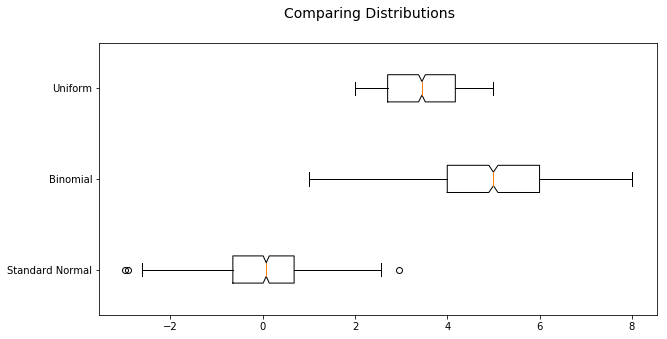

In [109]:
data = [norm, bino, uni]

fig = plt.figure(figsize = (10,5))
fig.suptitle('Comparing Distributions', fontsize=14)

ax = fig.add_subplot(111)
ax.boxplot(data, 1,  vert = False);
plt.yticks([1, 2, 3], ['Standard Normal', 'Binomial', 'Uniform'])
plt.show()

### Variations

### Alternatives

#### Violin Plot

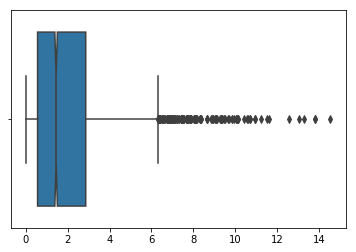

In [14]:
exp = np.random.exponential(2, 3500)
sns.boxplot(exp,notch=1);

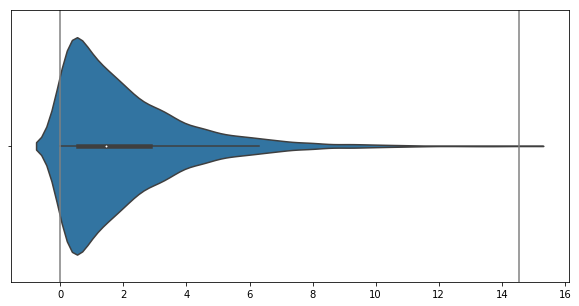

In [106]:
fig, (ax1) = plt.subplots(1, figsize=(10, 5));
sns.violinplot(exp, ax= ax1);

# Plotting lines at max and min values
bottom = np.min(exp)
ax1.axvline(bottom, 0, color='grey');
top = np.max(exp)
ax1.axvline(top, 0, color = 'grey');

### References

* Hadley Wickham and Lisa Stryjewski. [40 years of boxplots](http://vita.had.co.nz/papers/boxplots.pdf), November 29, 2011.


* [Boxplot, Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
* [Boxplot, Mathplotlib Documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
* [Understanding Boxplots, on TowardsDataScience.com](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)


* [Box plot, Wikipedia page](https://en.wikipedia.org/wiki/Box_plot)
* [John Tukey, Wikipedia page](https://en.wikipedia.org/wiki/John_Tukey)